<center><div dir="rtl" style="font-size:40px;"> بخش 5</div></center>
<div dir="rtl" style="font-size:18px;">
مقایسه رگرسورها
</div>


<div dir="rtl" style="font-size:18px;">
در بخش ۵، ما چندین الگوریتم یادگیری ماشین را برای ساخت مدل‌های رگرسیون مقایسه خواهیم کرد.
</div>


<div dir="rtl" style="font-size:18px;">
۱. وارد کردن کتابخانه‌ها
</div>


In [1]:
! pip install lazypredict


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

<div dir="rtl" style="font-size:18px;">
۲. بارگذاری مجموعه داده
</div>


In [3]:
df = pd.read_csv('./csv/bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

<div dir="rtl" style="font-size:18px;">
۳. پیش‌پردازش داده‌ها
</div>


In [5]:

X.shape

(86, 881)

In [6]:
#حذف ویژگی‌های با واریانس پایین
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(86, 185)

In [7]:
#تقسیم داده‌ها (نسبت ۸۰/۲۰)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<div dir="rtl" style="font-size:18px;">
۴. مقایسه الگوریتم‌های یادگیری ماشین
</div>


In [8]:
#تعریف و ساخت lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:02<00:00, 17.22it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 137
[LightGBM] [Info] Start training from score 4.737326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:02<00:00, 19.86it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 137
[LightGBM] [Info] Start training from score 4.737326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [9]:
# جدول عملکرد مجموعه آموزشی (زیرمجموعه ۸۰٪)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,11171265755425570782585883989989275468413042917...,-1967476655433160130807854193518207459808810231...,416959383176381433135124078024772158488576.00,0.03
KernelRidge,15.44,-24.43,4.74,0.01
QuantileRegressor,1.57,-0.00,0.94,0.01
LassoLars,1.57,0.00,0.94,0.01
DummyRegressor,1.57,0.00,0.94,0.00
Lasso,1.57,0.00,0.94,0.00
ElasticNet,1.54,0.06,0.91,0.00
LarsCV,1.43,0.24,0.82,0.10
LassoLarsCV,1.21,0.63,0.57,0.04


In [10]:
#جدول عملکرد مجموعه آزمایشی (زیرمجموعه ۲۰٪) 
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,59943913962526990737762887969064694405264789152...,-5923869144532078624542558980211889137059611899...,73384763217797615046606901758648382388121503861...,0.03
LassoLarsCV,149521896435744222740480.00,-1477628153012060585721856.00,1159006168834.56,0.04
LinearRegression,88026334481611524931584.00,-869907305465337478119424.00,889282319807.93,0.07
TransformedTargetRegressor,88026334481611524931584.00,-869907305465337478119424.00,889282319807.93,0.08
GaussianProcessRegressor,3.99,-28.59,5.19,0.05
KernelRidge,3.91,-27.73,5.11,0.00
MLPRegressor,1.16,-0.59,1.20,0.06
LinearSVR,1.15,-0.46,1.15,0.01
QuantileRegressor,1.14,-0.36,1.11,0.01


<div dir="rtl" style="font-size:18px;">
۵. مصورسازی داده‌ها برای عملکرد مدل
</div>


[(0.0, 1.0)]

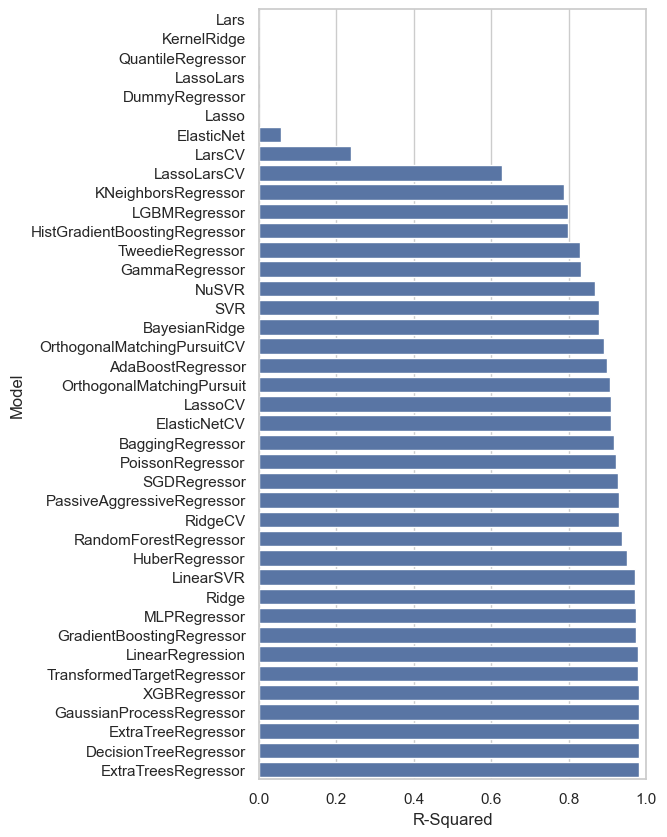

In [11]:
# نمودار میله‌ای مقادیر R-squared
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

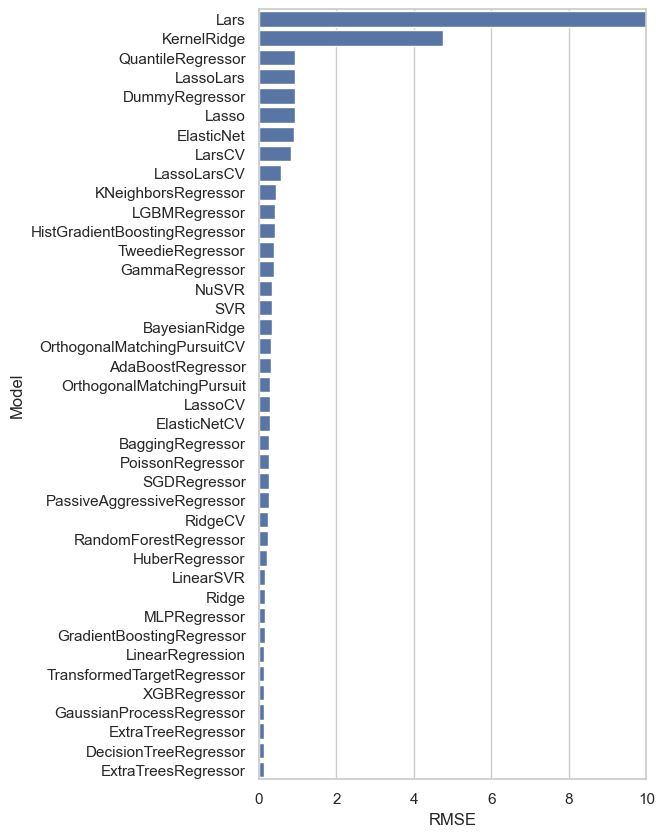

In [12]:
# نمودار میله‌ای مقادیر RMSE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

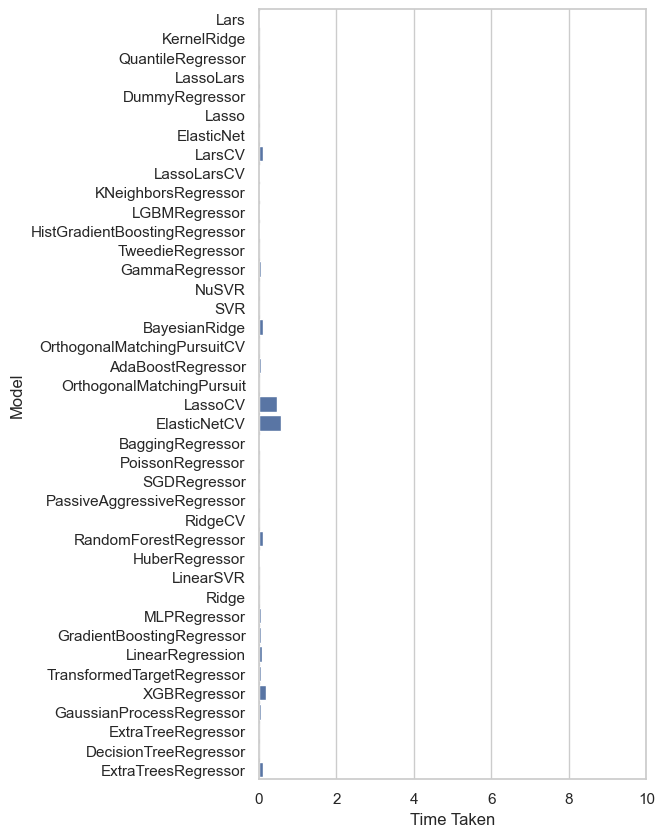

In [13]:
# نمودار میله‌ای زمان محاسبه
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

<div dir="rtl" style="font-size:18px;">
نصب Streamlit برای بخش بعدی
</div>


In [14]:
! pip install streamlit


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
